<div style="background-color: black; color: #4bcbcc; width: 100%; height: 50px; text-align: center; font-weight: bold; line-height: 50px; margin: 10px 0; font-size: 24px;">Traffic sign Using Computer Vision
</div>

#### *Project Overview and Key Features*  
This project leverages computer vision techniques to detect Traffic sign fractures from traffic  images, such as 'Speed limit (50km/h)' or 'No entry'. The goal is to build a robust system capable of automating the detection process to assist drivers in diagnosing signs accurately and efficiently.  

*Key Features:*  
1. *Automated Preprocessing*: Efficiently prepares raw traffic sign images for analysis.  
2. *Segmentation*: Identifies and isolates the regions of interest (sign) in the images.  
3. *Feature Extraction*: Extracts meaningful patterns from segmented images to idenify sign correctly . 
4. *Classification*: Utilizes deep learning models to classify images . 
5. *Performance Metrics*: Measures the accuracy, precision, recall, and F1-score of the detection network.  

---
#### *Dataset Description* 
- *Source*: Publicly available traffic sign datasets from Kaggle  
- *Types of Images*: 'No passing'or 'Stop' and other  
- *Format*: Typically stored in .jpg, .png,'jpeg' 

---

#### *Steps to Build the Project*  

### *1. Reading and Preprocessing the Dataset*  
- *Image Normalization*: Scale pixel values between 0 and 1 for uniformity.  
- *Data Augmentation*: Apply transformations like reduce_noise, , , and contrast adjustment to increase dataset diversity.  
- *Resizing*: Resize images to a standard size compatible with the neural network input dimensions.  
- *Label Encoding*: Convert textual labels into numeric values for classification.  
- ** convert_to_grayscale
- ** brighten_image : to control on the brightness of the image
*Tools*: Python libraries like NumPy, cv2.  

---

### *2. Image Segmentation*  
- *Goal*: Isolate the sign structure from the background to improve feature extraction accuracy.  
- *Techniques*:  
  - Automatic_thershold 
  -  Adaptive thersholding --> local (mean) 
  - cheng_jin_kuo (region based) 


### *3. Feature Extraction*  
- *Traditional Techniques*:chain code, Local Binary Patterns (LBP).  

---

### *4. Classification*  
- *Approach*:  
  - Use supervised learning algorithms such   
    
- *Model Optimization*: Use hyperparameter tuning (e.g., learning rate, number of layers) to optimize performance.  

*Tools*: PyTorch, scikit-learn.  

---
### *5. Accuracy and Evaluation of the Network*  
- *Metrics*:  
  - *Accuracy*: Percentage of correctly classified images.  
  - *Precision and Recall*: Measure the model’s reliability in detecting traffic sign.  
  - *F1-Score*: Balance between precision and recall.  
  - ** CrossEntropyLoss

*Tools*: pytorch, scikit-learn.


> # **Start**

In [38]:
import os               # type: ignore
import numpy as np      # type: ignore
import pandas as pd     # type: ignore
import matplotlib.pyplot as plt     # type: ignore
from matplotlib.image import imread # type: ignore
from tqdm import tqdm               # type: ignore
import cv2                          # type: ignore
import random                       # type: ignore
import torch                        # type: ignore
import torch.nn.functional as F     # type: ignore
from torchvision import transforms  # type: ignore
from torch.utils.data import DataLoader, TensorDataset , Subset     # type: ignore
from pathlib import Path                                            # type: ignore
from enum import Enum                                               # type: ignore
from PIL import Image                                               # type: ignore
import torch.nn as nn                                               # type: ignore
import torch.optim as optim                                         # type: ignore
from sklearn.model_selection import train_test_split                # type: ignore
from torchmetrics.classification import MulticlassAccuracy, MulticlassPrecision, MulticlassRecall, MulticlassF1Score    # type: ignore


random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

In [14]:
print(os.listdir(r"E:\( PROJECTS )\CV\GUI\strm"))

['.pytest_cache', 'Animation.json', 'Class.ipynb', 'Classificate_Model.pth', 'classification_model.pth', 'GUI.py', 'GUI1.py', 'Meta', 'Meta.csv', 'myclass.ipynb', 'OIP.jpeg', 'Test', 'Test.csv', 'Train', 'Train.csv']


In [15]:
# Define traffic sign classes using Enum for better readability and maintainability
class TrafficSignClass(Enum):
    SPEED_LIMIT_20 = 'Speed limit (20km/h)'
    SPEED_LIMIT_30 = 'Speed limit (30km/h)'
    SPEED_LIMIT_50 = 'Speed limit (50km/h)'
    SPEED_LIMIT_60 = 'Speed limit (60km/h)'
    SPEED_LIMIT_70 = 'Speed limit (70km/h)'
    SPEED_LIMIT_80 = 'Speed limit (80km/h)'
    END_SPEED_LIMIT_80 = 'End of speed limit (80km/h)'
    SPEED_LIMIT_100 = 'Speed limit (100km/h)'
    SPEED_LIMIT_120 = 'Speed limit (120km/h)'
    NO_PASSING = 'No passing'
    NO_PASSING_VEH_OVER_3_5_TONS = 'No passing veh over 3.5 tons'
    RIGHT_OF_WAY_AT_INTERSECTION = 'Right-of-way at intersection'
    PRIORITY_ROAD = 'Priority road'
    YIELD = 'Yield'
    STOP = 'Stop'
    NO_VEHICLES = 'No vehicles'
    VEH_OVER_3_5_TONS_PROHIBITED = 'Veh > 3.5 tons prohibited'
    NO_ENTRY = 'No entry'
    GENERAL_CAUTION = 'General caution'
    DANGEROUS_CURVE_LEFT = 'Dangerous curve left'
    DANGEROUS_CURVE_RIGHT = 'Dangerous curve right'
    DOUBLE_CURVE = 'Double curve'
    BUMPY_ROAD = 'Bumpy road'
    SLIPPERY_ROAD = 'Slippery road'
    ROAD_NARROWS_ON_THE_RIGHT = 'Road narrows on the right'
    ROAD_WORK = 'Road work'
    TRAFFIC_SIGNALS = 'Traffic signals'
    PEDESTRIANS = 'Pedestrians'
    CHILDREN_CROSSING = 'Children crossing'
    BICYCLES_CROSSING = 'Bicycles crossing'
    BEWARE_OF_ICE_SNOW = 'Beware of ice/snow'
    WILD_ANIMALS_CROSSING = 'Wild animals crossing'
    END_SPEED_PASSING_LIMITS = 'End speed + passing limits' 
    TURN_RIGHT_AHEAD = 'Turn right ahead'
    TURN_LEFT_AHEAD = 'Turn left ahead'
    AHEAD_ONLY = 'Ahead only'
    GO_STRAIGHT_OR_RIGHT = 'Go straight or right'
    GO_STRAIGHT_OR_LEFT = 'Go straight or left'
    KEEP_RIGHT = 'Keep right'
    KEEP_LEFT = 'Keep left'
    ROUNDABOUT_MANDATORY = 'Roundabout mandatory'
    END_NO_PASSING = 'End of no passing'
    END_NO_PASSING_VEH_OVER_3_5_TONS = 'End no passing veh > 3.5 tons'

# Example usage
classes = {i: sign.value for i, sign in enumerate(TrafficSignClass)}

> # **PreProcess**

In [16]:
class PreProcess:
    def resize_image(self, image, size=(255, 255)):
        return cv2.resize(image, size)
    
    def convert_to_grayscale(self, image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    def reduce_noise(self, image):
        return cv2.GaussianBlur(image, (5, 5), 0)
    
    def enhance_contrast(self, image):
        if len(image.shape) == 3:  # Check if the image is BGR
            lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
            l, a, b = cv2.split(lab)
            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            cl = clahe.apply(l)
            lab = cv2.merge((cl, a, b))
            image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
        return image
    
    def normalize_image(self, image):
        return image / 255.0 if image.dtype != np.float32 else image
    
    def brighten_image(self, image, alpha=1.0, beta=50):
        return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

> # **Segmentation**

In [17]:

### local thresholding 
def local_thresholding(image):
    _, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return thresholded
### automatic thresholding
def automatic_thresholding(image, block_size=15):
    rows, cols = image.shape
    result = np.zeros_like(image)
    for i in range(0, rows, block_size):
        for j in range(0, cols, block_size):
            block = image[i:i + block_size, j:j + block_size]
            threshold = np.mean(block)
            result[i:i + block_size, j:j + block_size] = (block > threshold).astype(np.uint8) * 255
    return result

### CHOW and KANEKO
def chow_kaneko(image, block_size=15):
    rows, cols = image.shape
    result = np.zeros_like(image)
    for i in range(0, rows, block_size):
        for j in range(0, cols, block_size):
            block = image[i:i + block_size, j:j + block_size]
            threshold = np.mean(block)
            result[i:i + block_size, j:j + block_size] = (block > threshold).astype(np.uint8) * 255
    return result

### cheng jin kuo
def cheng_jin_kuo(image, block_size=15, k=0.5):
    if len(image.shape) == 3:  # Convert to grayscale if the image is color
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = image.shape
    result = np.zeros_like(image)
    for i in range(0, rows, block_size):
        for j in range(0, cols, block_size):
            block = image[i:i + block_size, j:j + block_size]
            local_mean = np.mean(block)
            local_std = np.std(block)
            threshold = local_mean - k * local_std
            result[i:i + block_size, j:j + block_size] = (block > threshold).astype(np.uint8) * 255
    return result

Extracting chain codes:   0%|          | 0/1 [00:00<?, ?it/s]

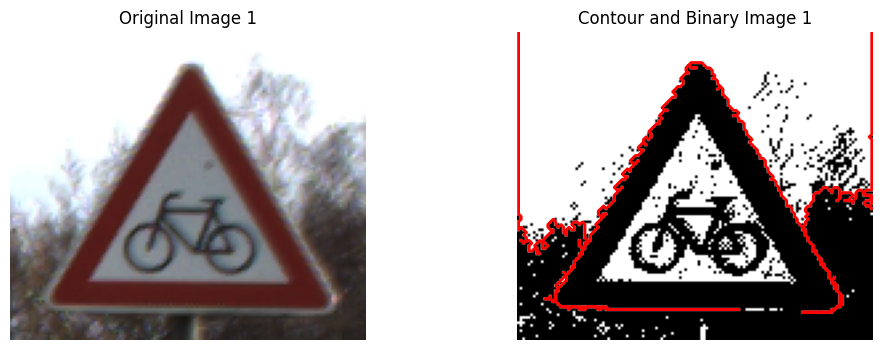

Extracting chain codes: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

Extracted Features:
 [[7 6 5 1 5 7 6 5 3 7 1 0 7 5 0 1 7 6 0 3 2 3 7 0 1 0 2 4 3 2 7 6 7 1 7 7
  1 7 0 2 3 1 0 7 1 7 7 5 6 5 3 7 6 5 6 6 5 6 3 7 7 5 5 3 2 5 4 7 0 7 1 7
  1 7 0 1 7 3 1 2 2 1 2 3 4 5 3 2 7 5 4 3 0 1 4 3 7 2 5 4 3 0 4 3 7 3 2 1
  7 1 2 3 0 2 1 3 0 4 3 0 2 3 0 1 2 3 0 3 2 1 7 3 1 0 7 6 7 5 0 7 6 7 5 1
  7 0 7 5 4 0 7 6 0 7 7 6 5 6 7 6 0 7 7 6 5 0 7 6 7 6 7 6 0 7 6 7 6 7 6 6
  7 6 7 6 6 7 6 7 6 7 6 4 5 0 1 1 5 3 2 3 2 2 3 2 2 3 3 1 2 1 3 1 3 2 1 0
  2 1 1 0 0 2 1 0 7 5 1 2 1 7 4 7 2 1 1 0 7 6 7 5 4 5 7 0 7 3 1 3 1 3 1]]


In [21]:
chain_code_direction_8 = {
    (0, 1): 0,  # Right
    (-1, 1): 1,  # Upper-right
    (-1, 0): 2,  # Up
    (-1, -1): 3,  # Upper-left
    (0, -1): 4,  # Left
    (1, -1): 5,  # Lower-left
    (1, 0): 6,  # Down
    (1, 1): 7   # Lower-right
}

# Sharpening filter
sharpening_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

def extract_chain_code(image, max_code_length=None):
    """Extract chain code from the largest contour of a binary image."""
    # Convert to grayscale if needed
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) if len(image.shape) == 3 else image
    # Apply sharpening and thresholding
    sharpened = cv2.filter2D(gray_img, -1, sharpening_kernel)
    _, binary_img = cv2.threshold(sharpened, 128, 255, cv2.THRESH_BINARY)
    # Find contours and select the largest one
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return None  # No contours found
    
    largest_contour = max(contours, key=cv2.contourArea)
    # Generate chain code
    chain_codes = []
    for i in range(1, len(largest_contour)):
        prev, curr = largest_contour[i - 1][0], largest_contour[i][0]
        dx, dy = curr[0] - prev[0], curr[1] - prev[1]
        direction = chain_code_direction_8.get((dy, dx))
        if direction is not None:
            chain_codes.append(direction)
    
    # Pad the chain code if a max_code_length is provided
    if max_code_length:
        chain_codes += [0] * (max_code_length - len(chain_codes))
    
    return chain_codes, binary_img, largest_contour

# Simplified processing loop
def process_images(images, num_samples_to_show=10):
    """Extract chain codes from a list of images."""
    features = []
    max_code_length = 0
    # First pass: find max chain code length
    for img in tqdm(images, desc="Finding max chain code length"):
        chain_codes, _, _ = extract_chain_code(img)
        if chain_codes:
            max_code_length = max(max_code_length, len(chain_codes))
    # Second pass: extract features and visualize results
    for idx, img in enumerate(tqdm(images, desc="Extracting chain codes")):
        result = extract_chain_code(img, max_code_length)
        if result:
            chain_codes, binary_img, contour = result
            features.append(chain_codes)
            # Visualization for a few samples
            if idx < num_samples_to_show:
                plt.figure(figsize=(12, 4))
                plt.subplot(1, 2, 1)
                plt.imshow(img, cmap='gray')
                plt.title(f"Original Image {idx + 1}")
                plt.axis('off')
                plt.subplot(1, 2, 2)
                plt.imshow(binary_img, cmap='gray')
                plt.plot(contour[:, 0, 0], contour[:, 0, 1], 'r-', lw=2)
                plt.title(f"Contour and Binary Image {idx + 1}")
                plt.axis('off')
                plt.show()
    return np.array(features)

image_path = r"E:\( PROJECTS )\CV\GUI\strm\Meta\29\00029_00005_00028.png"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)  # Load the image
if image is None:
    print("Error: Image not found. Check the path!")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for consistent display
    features = process_images([image])  # Process a single image
    print("Extracted Features:\n", features)

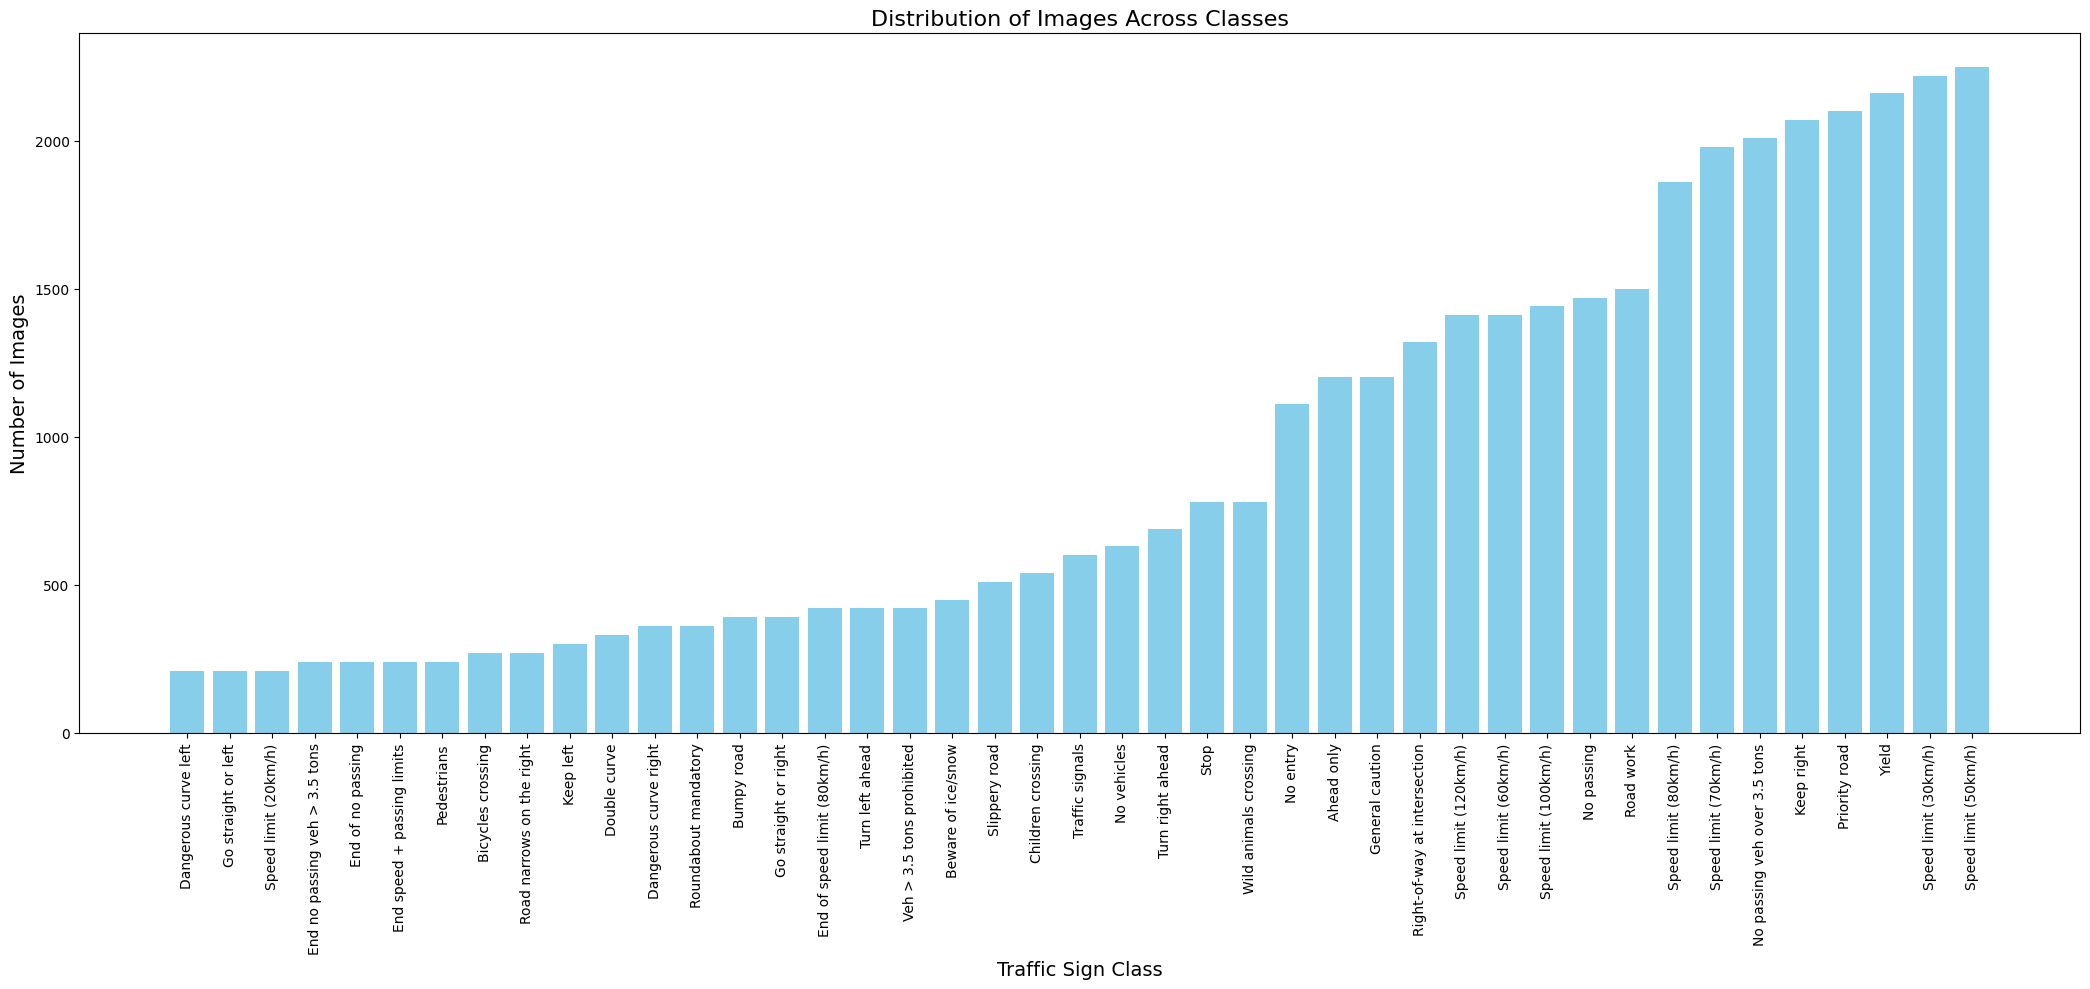

In [22]:
# Define paths
train_path = Path(r"E:\( PROJECTS )\CV\GUI\strm\Train")
folders = [folder for folder in train_path.iterdir() if folder.is_dir()]

train_number = []
class_num = []

# Collect number of images per class
for folder in folders:
    train_files = list(folder.iterdir())
    if train_files:  # Check if the folder is not empty
        train_number.append(len(train_files))
        class_num.append(classes[int(folder.name)])  # Map folder index to class name

# Sorting the dataset on the basis of number of images in each class
sorted_pairs = sorted(zip(train_number, class_num))  # Sort by number of images
train_number, class_num = zip(*sorted_pairs)  # Unzip the sorted pairs

# Plotting the number of images in each class
plt.figure(figsize=(21, 10))
plt.bar(class_num, train_number, color='skyblue')
plt.xticks(rotation='vertical')
plt.xlabel("Traffic Sign Class", fontsize=14)
plt.ylabel("Number of Images", fontsize=14)
plt.title("Distribution of Images Across Classes", fontsize=16)
plt.tight_layout()  # Adjust layout for better visualization
plt.show()

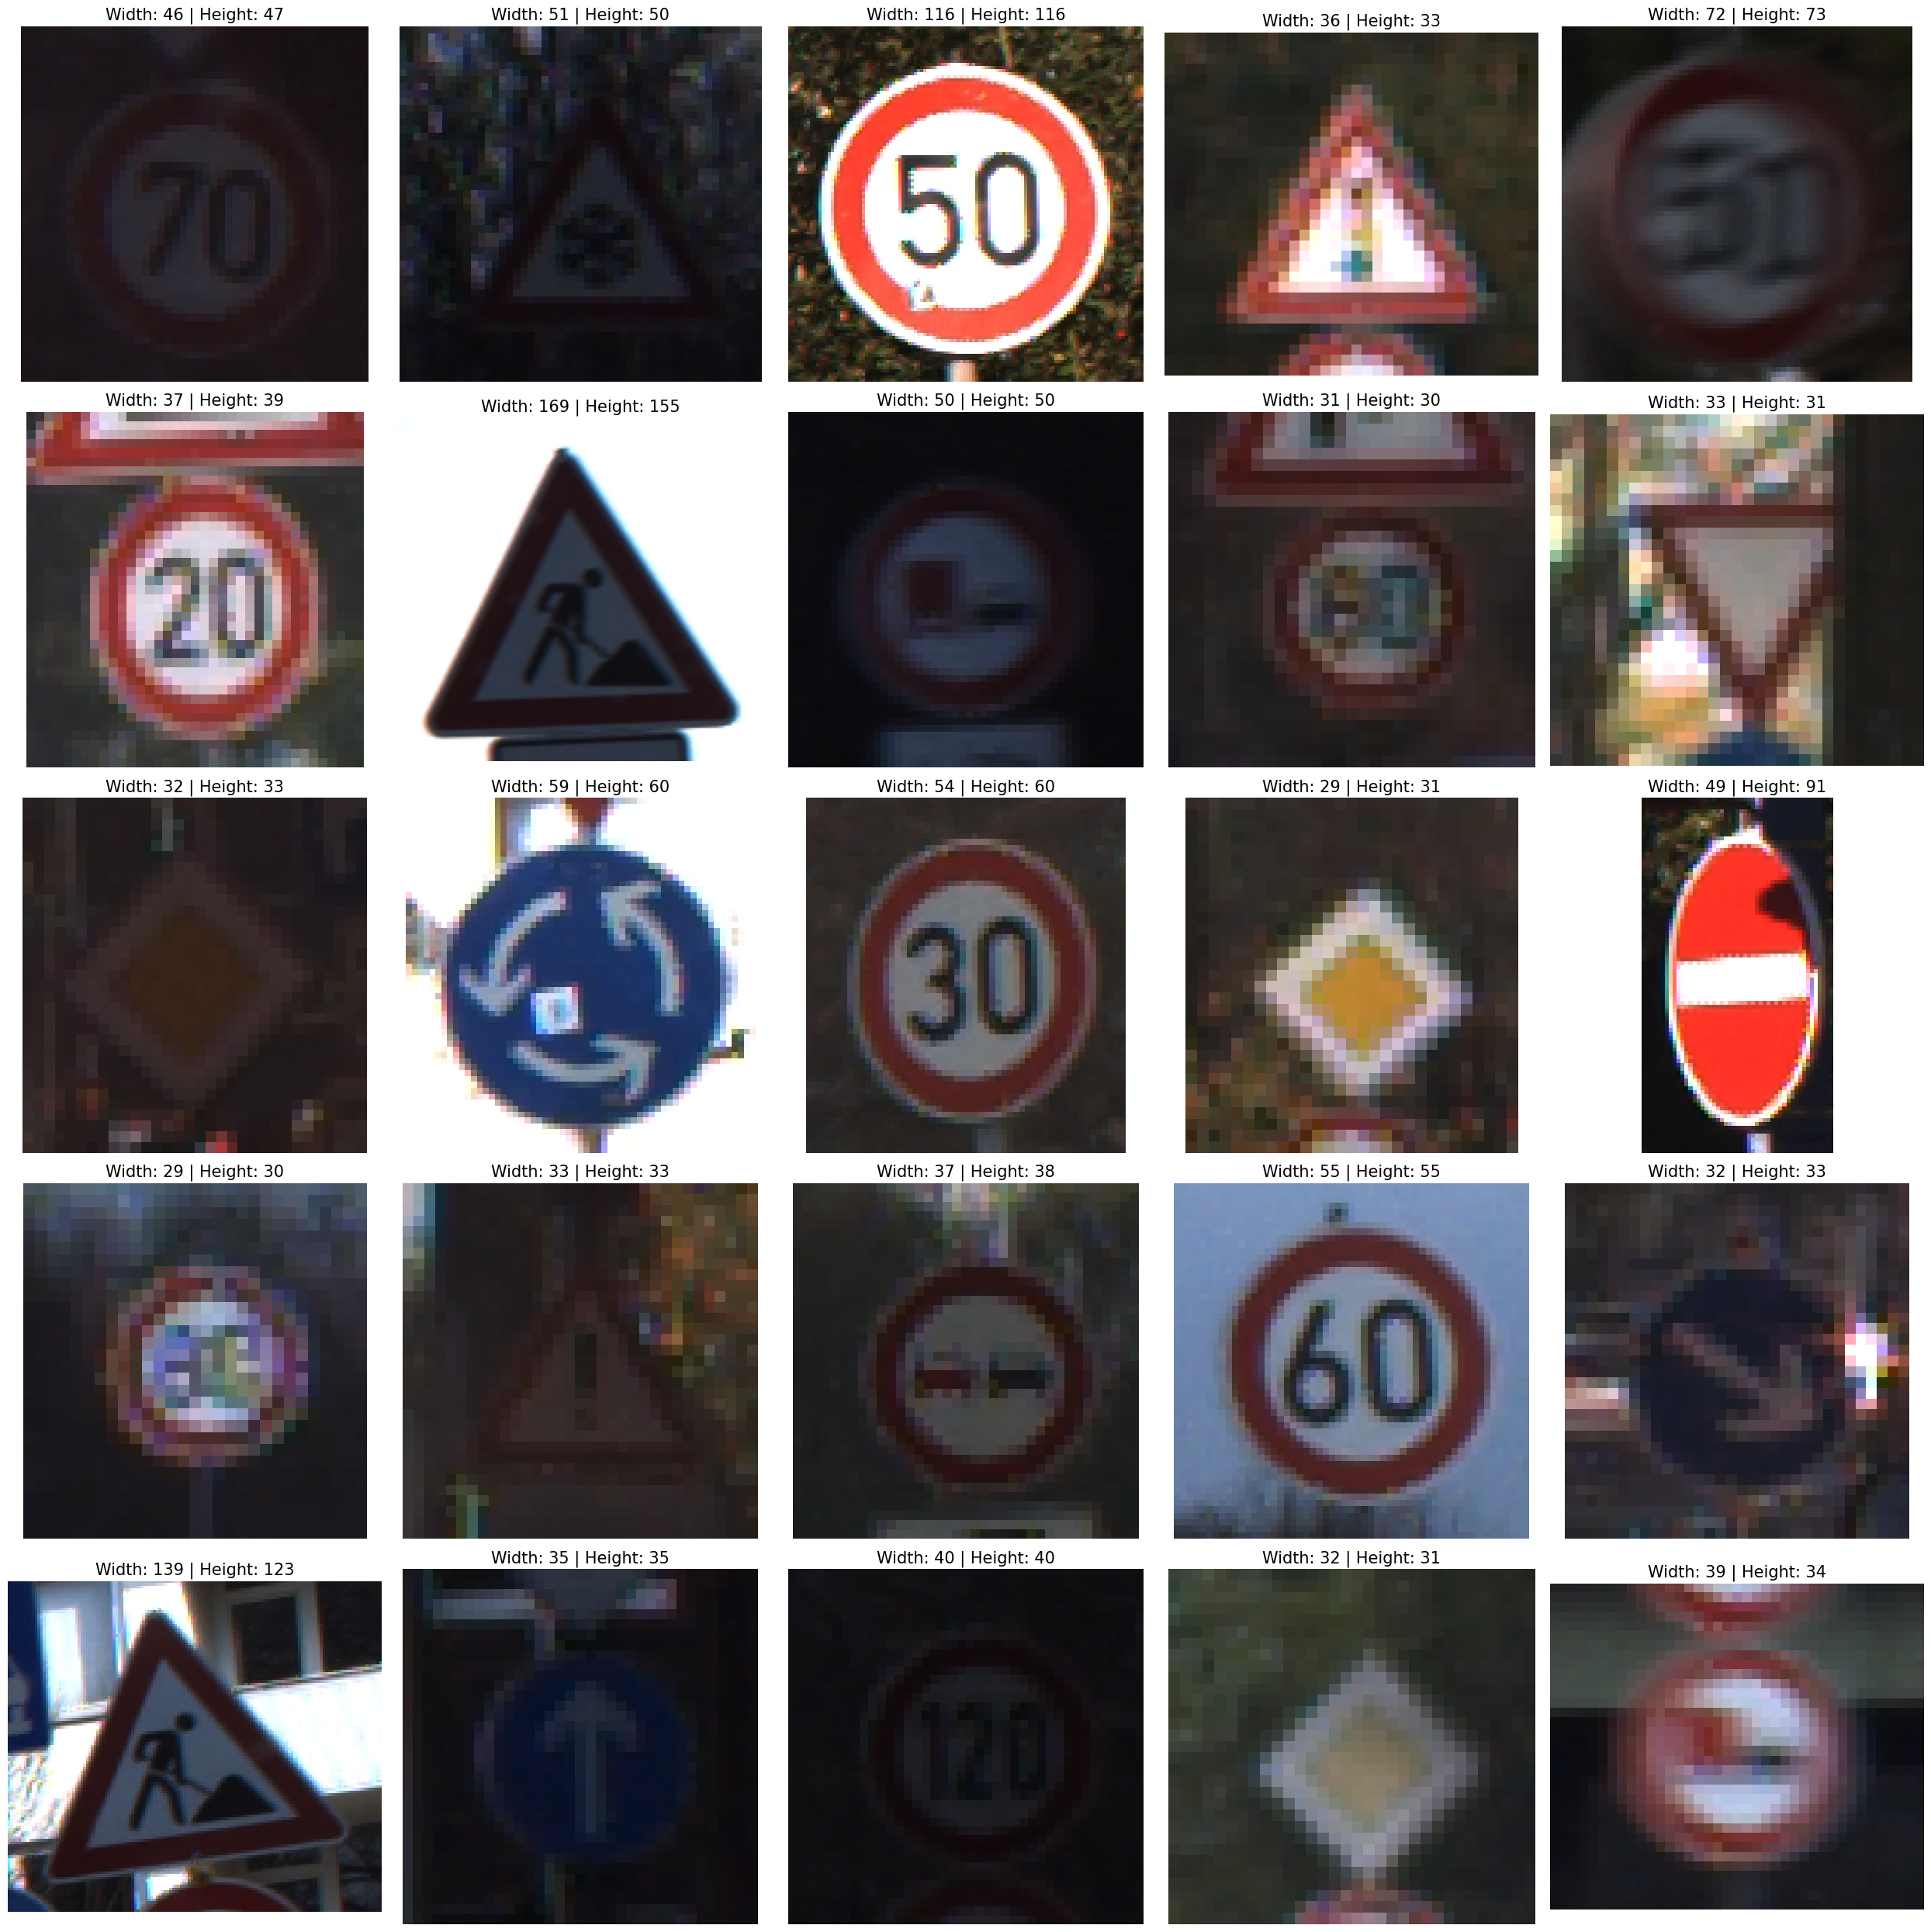

In [23]:
# Load the test data
test = pd.read_csv(r"E:\( PROJECTS )\CV\GUI\strm\Test.csv")
imgs = test["Path"].values

# Define the base path
base_path = Path(r"E:\( PROJECTS )\CV\GUI\strm")

# Display random 25 images from the test set
plt.figure(figsize=(25, 25))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    random_img_path = base_path / random.choice(imgs)
    
    # Ensure the file exists before reading
    if random_img_path.exists():
        rand_img = imread(random_img_path)
        plt.imshow(rand_img)
        plt.axis('off')  # Turn off the axis
        plt.title(f"Width: {rand_img.shape[1]} | Height: {rand_img.shape[0]}", fontsize=15)
    else:
        print(f"Error: File {random_img_path} does not exist.")
    
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

> # **Prepare Data**

In [24]:
num_classes = 43
image_size = (30, 30)  # Image dimensions (width, height)

# Initialize arrays for images and labels
images = []
labels = []

# Load images and labels
base_path = Path(r"E:\( PROJECTS )\CV\GUI\strm\train")
for class_label in tqdm(range(num_classes), desc="Loading data"):
    class_dir = base_path / str(class_label)
    if class_dir.is_dir():  # Check if the directory exists
        for filename in class_dir.iterdir():
            img_path = class_dir / filename
            
            # Read and process the image
            image = cv2.imread(str(img_path), cv2.IMREAD_COLOR)
            if image is not None:  # Check if the image was read successfully
                image = cv2.resize(image, image_size)
                images.append(image)
                labels.append(class_label)
            else:
                print(f"Warning: Could not read image {img_path}")

# Convert to NumPy arrays
images = np.array(images, dtype=np.float32)  # Convert images to float32
labels = np.array(labels, dtype=np.int64)   # Labels as integers

# Normalize images to [0, 1]
images /= 255.0

# Convert to Torch tensors
images = torch.tensor(images).permute(0, 3, 1, 2)  # Change to (N, C, H, W)
labels = torch.tensor(labels)

# Print shapes for verification
print(f"Images shape: {images.shape}")  # (N, 3, 30, 30)
print(f"Labels shape: {labels.shape}")  # (N,)

Loading data: 100%|██████████| 43/43 [00:24<00:00,  1.73it/s]


Images shape: torch.Size([39209, 3, 30, 30])
Labels shape: torch.Size([39209])


In [25]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, shuffle=True)

# Ensure the data types are correct
X_train = X_train.float()
X_test = X_test.float()
y_train = y_train.long()
y_test = y_test.long()

# Print shapes for verification
print(f"X_train Shape: {X_train.shape}")
print(f"X_test  Shape: {X_test.shape}")
print(f"y_train Shape: {y_train.shape}")
print(f"y_test  Shape: {y_test.shape}")

X_train Shape: torch.Size([31367, 3, 30, 30])
X_test  Shape: torch.Size([7842, 3, 30, 30])
y_train Shape: torch.Size([31367])
y_test  Shape: torch.Size([7842])


In [50]:
# Ensure labels are of type long for classification tasks
y_train = y_train.clone().detach().long()
y_test = y_test.clone().detach().long()

# Print shapes for verification
print(y_train.shape)
print(y_test.shape)

# Create TensorDatasets
train_loader = TensorDataset(X_train, y_train)
test_loader = TensorDataset(X_test, y_test)

# Create DataLoaders
train_loader = DataLoader(train_loader, batch_size=32, shuffle=True, num_workers=2)
test_loader = DataLoader(test_loader, batch_size=32, shuffle=False, num_workers=2)

torch.Size([31367])
torch.Size([7842])


> # **Model**

In [31]:
class ClassificationModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ClassificationModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        return self.model(x)

input_size = 30 * 30 * 3  # Flattened size of input images
model = ClassificationModel(input_size, num_classes)

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

ClassificationModel(
  (model): Sequential(
    (0): Linear(in_features=2700, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Linear(in_features=64, out_features=43, bias=True)
  )
)

> # **train**

In [33]:
def train_model(model, optimizer, train_loader, criterion, scheduler=None, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", leave=False)
        
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)
            
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels.long())
            
            # Backward pass and optimization
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            # Calculate accuracy
            with torch.no_grad():
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
            
            # Update progress bar
            progress_bar.set_postfix(loss=running_loss/len(train_loader), accuracy=100.*correct/total)
        
        # Step the scheduler if provided
        if scheduler:
            scheduler.step()
        
        # Calculate epoch loss and accuracy
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100. * correct / total
        print(f"Epoch [{epoch+1}/{epochs}]   |   Loss: {epoch_loss:.4f}   |   Accuracy: {epoch_accuracy:.2f}%")

In [34]:
train_model(model, optimizer, train_loader, criterion, scheduler=scheduler, epochs=30)

Epoch [1/30]   |   Loss: 2.2070   |   Accuracy: 39.74%


Epoch [2/30]   |   Loss: 1.2705   |   Accuracy: 62.44%


Epoch [3/30]   |   Loss: 1.0314   |   Accuracy: 69.34%


Epoch [4/30]   |   Loss: 0.9058   |   Accuracy: 72.82%


Epoch [5/30]   |   Loss: 0.8343   |   Accuracy: 75.14%


Epoch [6/30]   |   Loss: 0.7860   |   Accuracy: 76.83%


Epoch [7/30]   |   Loss: 0.7355   |   Accuracy: 77.83%


Epoch [8/30]   |   Loss: 0.6985   |   Accuracy: 79.24%


Epoch [9/30]   |   Loss: 0.6852   |   Accuracy: 79.69%


Epoch [10/30]   |   Loss: 0.6676   |   Accuracy: 80.18%


Epoch [11/30]   |   Loss: 0.4978   |   Accuracy: 85.55%


Epoch [12/30]   |   Loss: 0.4546   |   Accuracy: 86.62%


Epoch [13/30]   |   Loss: 0.4530   |   Accuracy: 86.73%


Epoch [14/30]   |   Loss: 0.4424   |   Accuracy: 87.31%


Epoch [15/30]   |   Loss: 0.4320   |   Accuracy: 87.25%


Epoch [16/30]   |   Loss: 0.4322   |   Accuracy: 87.23%


Epoch [17/30]   |   Loss: 0.4253   |   Accuracy: 87.53%


Epoch [18/30]   |   Loss: 0.4267   |   Accuracy: 87.35%


Epoch [19/30]   |   Loss: 0.4157   |   Accuracy: 87.87%


Epoch [20/30]   |   Loss: 0.4227   |   Accuracy: 87.50%


Epoch [21/30]   |   Loss: 0.4077   |   Accuracy: 87.92%


Epoch [22/30]   |   Loss: 0.3963   |   Accuracy: 88.30%


Epoch [23/30]   |   Loss: 0.3964   |   Accuracy: 88.31%


Epoch [24/30]   |   Loss: 0.3944   |   Accuracy: 88.26%


Epoch [25/30]   |   Loss: 0.3969   |   Accuracy: 88.19%


Epoch [26/30]   |   Loss: 0.3978   |   Accuracy: 88.37%


Epoch [27/30]   |   Loss: 0.3970   |   Accuracy: 88.42%


Epoch [28/30]   |   Loss: 0.3963   |   Accuracy: 88.41%


Epoch [29/30]   |   Loss: 0.4011   |   Accuracy: 88.33%


Epoch [30/30]   |   Loss: 0.3941   |   Accuracy: 88.33%


> # **test**

In [35]:
def test_model(model, data_loader, criterion, device):
    model.eval()
    val_loss = 0.0
    val_preds, val_targets = [], []
    
    # Initialize metrics
    accuracy_metric = MulticlassAccuracy(num_classes=num_classes, average='weighted').to(device)
    precision_metric = MulticlassPrecision(num_classes=num_classes, average='weighted').to(device)
    recall_metric = MulticlassRecall(num_classes=num_classes, average='weighted').to(device)
    f1_metric = MulticlassF1Score(num_classes=num_classes, average='weighted').to(device)
    
    with torch.no_grad():
        progress_bar = tqdm(data_loader, desc="Testing", leave=False)
        for images, targets in progress_bar:
            images, targets = images.to(device), targets.to(device)
            
            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, targets.long())
            
            # Update loss and predictions
            val_loss += loss.item()
            preds = torch.argmax(outputs, dim=1)  # Convert outputs to class indices
            val_preds.extend(preds.cpu().numpy())
            val_targets.extend(targets.cpu().numpy())
            
            # Update metrics
            accuracy_metric.update(preds, targets)
            precision_metric.update(preds, targets)
            recall_metric.update(preds, targets)
            f1_metric.update(preds, targets)
    
    avg_val_loss = val_loss / len(data_loader)
    
    # Compute metrics
    val_accuracy = accuracy_metric.compute().item()
    val_precision = precision_metric.compute().item()
    val_recall = recall_metric.compute().item()
    val_f1 = f1_metric.compute().item()
    
    print(f"Validation Loss : {avg_val_loss:.2f}\t|\t Accuracy : {val_accuracy:.2f}\t|\tPrecision : {val_precision:.3f}\t|\tRecall : {val_recall:.2f}\t|\tF1 : {val_f1:.2f}")
    
    # Reset metrics
    accuracy_metric.reset()
    precision_metric.reset()
    recall_metric.reset()
    f1_metric.reset()

In [36]:
test_model(model, test_loader, criterion, device)

Validation Loss : 0.20	|	 Accuracy : 0.95	|	Precision : 0.951	|	Recall : 0.95	|	F1 : 0.95


> # **save model**

In [37]:
# Save the model's state dictionary
state_dict = model.state_dict()
torch.save(state_dict, r"E:\( PROJECTS )\CV\GUI\strm\Classificate_Model.pth")

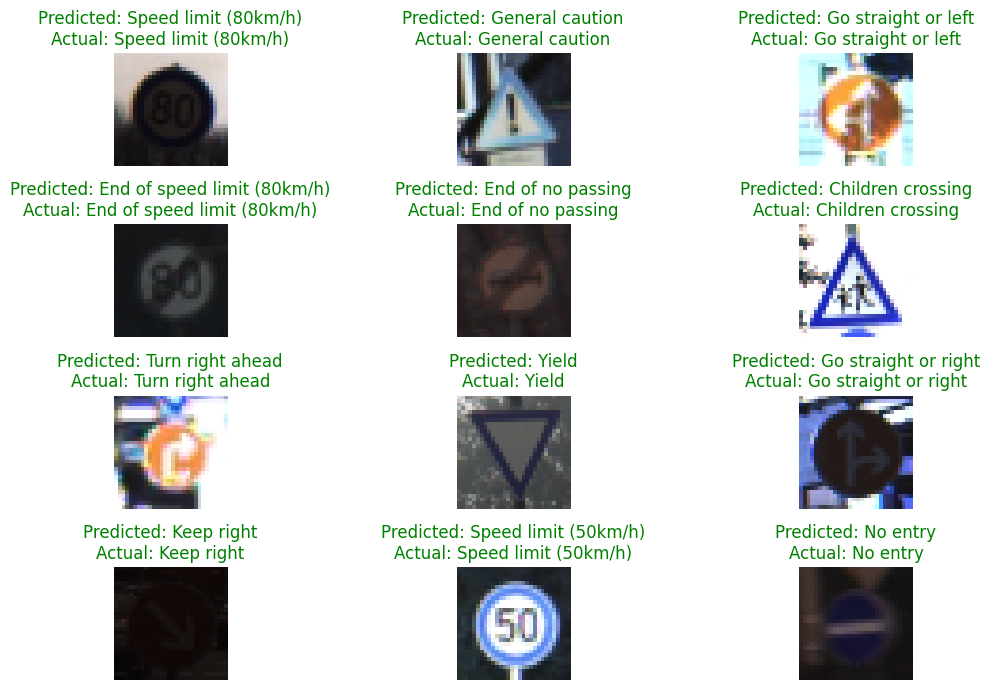

In [53]:
pre = PreProcess()

random_indices = random.sample(range(len(X_test)), 12)
subset = Subset(test_loader.dataset, random_indices)
random_loader = DataLoader(subset, batch_size=1)
model.eval()

fig, axes = plt.subplots(4, 3, figsize=(12, 7))
axs = axes.ravel()

# Iterate through the random_loader and plot images
for i, (img, actual_label) in enumerate(random_loader):
    img = img.to(device)  # Move image to the appropriate device
    actual_label = int(actual_label.item())  # Convert to an integer
    
    # Forward pass
    with torch.no_grad():
        output = model(img)
        prediction = int(output.argmax(dim=1).item())  # Convert to an integer
    
    # Prepare image for visualization
    img = img.squeeze().permute(1, 2, 0).cpu().numpy()  
    img = np.clip(img, 0, 1)  
    img = np.clip(img, 0, 1)  # Clip values to be in the range [0, 1]
    
    # Plot image and predictions
    axs[i].imshow(img)
    col = 'green' if actual_label == prediction else 'red'
    axs[i].set_title(f'Predicted: {classes[prediction]}\nActual: {classes[actual_label]}', color=col)
    axs[i].axis('off')

plt.tight_layout()
plt.show()

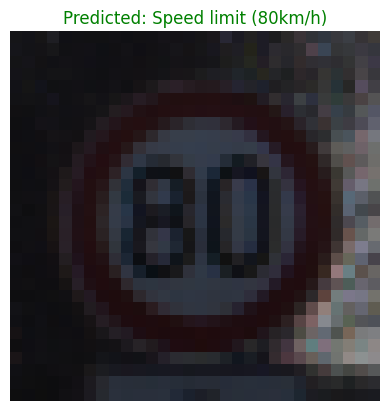

In [75]:
image_path = input("Enter the path to the image: ")
image = Image.open(image_path)

pre = PreProcess()
image = np.array(image)
image = pre.resize_image(image, size=(30, 30))
image = pre.normalize_image(image)
preprocessed_img = torch.tensor(image).permute(2, 0, 1).unsqueeze(0).float()  

device = 'cuda' if torch.cuda.is_available() else 'cpu'
img_for_model = preprocessed_img.to(device)

model.eval()

img_for_model = img_for_model.reshape(img_for_model.size(0), -1)  

with torch.no_grad():
    output = model(img_for_model)
    prediction = int(output.argmax(dim=1).item()) 
img_for_visualization = preprocessed_img.squeeze().permute(1, 2, 0).cpu().numpy()  
img_for_visualization = np.clip(img_for_visualization, 0, 1)  

# Plot image and prediction
plt.imshow(img_for_visualization)
plt.title(f'Predicted: {classes[prediction]}', color='green')
plt.axis('off')
plt.show()